<a href="https://colab.research.google.com/github/Chavelax/appLogueo1/blob/main/EDA/NoCountry_EDA_S14_27_n_data_bi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="font-size:2em;color:RED">Análisis de tráfico aéreo: Brindar información útil para optimizar rutas, Visualizar tráfico frecuente, horarios pico y destinos mas buscados</h1></center>

# Proyecto correspondiente al programa de No Country [S14-27-n-data-bi ]

Realizado por:

* **Gabriela Sastre**
* **Harlan Tonguino**
* **Isabel Marquinez**
* **Eglimar Ramirez**
* **Maria Atencio**

# **Caso de estudio**

El desarrollo del presente proyecto propone realizar un estudio a un dataset que contiene datos de vuelos nacionales e internacionales en USA, lo cual tiene como objetivo brindar información útil para optimizar rutas aereas, identificar tráfico frecuente y destinos más buscados.
<br><br>
En el trancurso del desarrollo del proyecto se realizan las siguientes actividades:
* Limpieza, preparación y carga de los datos a  Google Cloud Platform
* Análisis exploratorio para identificar patrones y datos atipicos
* Desarrollo de algoritmos de machine learning
* Presentar resultado del análisis aplicado

# **Conjunto de datos**

## **Descripción del conjunto de datos**

El conjunto de datos a analizar a tráves del desarrollo del presente proyecto contiene datos de vuelos nacionales e internacionales de USA
<br><br>
El dataset esta disponible de forma pública en el portal web:
<br><br>
https://www.transportation.gov/policy/aviation-policy/us-international-air-passenger-and-freight-statistics-report
<br><br>
Las columnas que contiene el conjunto de datos son las siguientes:
<br><br>
* año: Año del vuelo
* mes: Mes del vuelo
* aeropuerto_ori: aeropuerto de origen
* aeropuerto_des: aeropuerto de destino
* aerolinea: aerolinea (codigo de aerolinea)
*	tipo: categoria de datos
* vuelos_pas.com: cantidad de vuelos de pasajeros comercial
* vuelos_pas.pri: cantidad de vuelos de pasajeros privado
* asientos_com	cantidad de asientos en vuelos comercial
* asientos_pri: cantidad de asientos en vuelo privado
* pasajeros_com: pasajeros de vuelo comercial
* pasajeros_pri: pasajeros de vuelo privado
* vuelos_car.com: vuelos de carga comercial
* vuelos_car.pri: vuelos de carga privado

## **Descubrir y visualizar los datos**

### Análisis exploratorio inicial

In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Montar drive al colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos la base de datos (salidas Internacionales USA)
df = pd.read_csv('/content/drive/MyDrive/DATA ANALYSIS2/SalidasInternacionalesUSA.csv')
aerol = pd.read_csv('/content/drive/MyDrive/DATA ANALYSIS2/aerolineas.csv')
aerop = pd.read_csv('/content/drive/MyDrive/DATA ANALYSIS2/aeropuertos.csv')
dfv2 = pd.read_csv('/content/drive/MyDrive/DATA ANALYSIS2/Flights.csv')

In [ ]:
#Mostrar cantidad de datos
df.shape

(1051632, 14)

Se muestra la cantidad de filas y columnas que contiene la base de datos tomada para el análisis exploratorio, y se puede verifificar que la data tiene 14 columnas y 1051632 filas.

In [ ]:
# Mostrar las columnas del dataframe
df.columns.values

array(['año', 'mes', 'aeropuerto_ori', 'aeropuerto_des', 'aerolinea',
       'tipo', 'vuelos_pas.com', 'vuelos_pas.pri', 'asientos_com',
       'asientos_pri', 'pasajeros_com', 'pasajeros_pri', 'vuelos_car.com',
       'vuelos_car.pri'], dtype=object)

Se muestra cada una de las columnas del dataframe con sus respectivos nombres.

In [ ]:
# Mostrar información de las columnas, cantidad de datos no nulos y tipo de datos que contiene el conjunto
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1051632 entries, 0 to 1051631
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   año             1051632 non-null  int64  
 1   mes             1051632 non-null  int64  
 2   aeropuerto_ori  1051632 non-null  object 
 3   aeropuerto_des  1051632 non-null  object 
 4   aerolinea       1051632 non-null  int64  
 5   tipo            1051632 non-null  object 
 6   vuelos_pas.com  1051606 non-null  float64
 7   vuelos_pas.pri  1051606 non-null  float64
 8   asientos_com    789862 non-null   float64
 9   asientos_pri    789862 non-null   float64
 10  pasajeros_com   766981 non-null   float64
 11  pasajeros_pri   766981 non-null   float64
 12  vuelos_car.com  625584 non-null   float64
 13  vuelos_car.pri  625584 non-null   float64
dtypes: float64(8), int64(3), object(3)
memory usage: 112.3+ MB


Utilizando df.info(), siendo ´df´ el dataframe puesto en análisis, se puede visualizar el nombre de cada columna de la base de datos como tambien la cantidad de datos no nulos para cada una columna y el tipo de dato respectivamente.

In [ ]:
# Comprobando valores faltantes en el dataframe
missing_values = df.isnull().sum()
print("\nValores Faltantes en el Conjunto de Datos:")
print(missing_values)


Valores Faltantes en el Conjunto de Datos:
año                    0
mes                    0
aeropuerto_ori         0
aeropuerto_des         0
aerolinea              0
tipo                   0
vuelos_pas.com        26
vuelos_pas.pri        26
asientos_com      261770
asientos_pri      261770
pasajeros_com     284651
pasajeros_pri     284651
vuelos_car.com    426048
vuelos_car.pri    426048
dtype: int64


Se muestra la cantidad de datos faltantes para cada columna en el dataframe, y se visualiza que en las columnas vuelos_pas.com, vuelos_pas.pri, asientos_com, asientos_pri, pasajeros_com, pasajeros_pri, vuelos_car.com, vuelos_car.pri existen datos faltantes

In [ ]:
# Mostrar las primeras filas del dataframe
df.head()

,año,mes,aeropuerto_ori,aeropuerto_des,aerolinea,tipo,vuelos_pas.com,vuelos_pas.pri,asientos_com,asientos_pri,pasajeros_com,pasajeros_pri,vuelos_car.com,vuelos_car.pri
0,2006,5,GUM,MAJ,20177,"['VueloPasajeros', 'VueloCarga', nan, nan]",0.0,10.0,NaN,NaN,NaN,NaN,0.0,16.0
1,2009,4,ATL,ZRH,19790,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",54.0,0.0,11661.0,0.0,8496.0,0.0,280.0,0.0
2,2003,5,ANC,OKO,20007,"['VueloPasajeros', 'VueloCarga', nan, nan]",0.0,15.0,NaN,NaN,NaN,NaN,0.0,762.0
3,2005,2,CLT,SKB,20355,"['VueloPasajeros', nan, 'Asientos', 'Pasajeros']",8.0,0.0,952.0,0.0,733.0,0.0,NaN,NaN
4,2004,1,JFK,EZE,19535,"['VueloPasajeros', 'VueloCarga', 'Asientos', '...",30.0,0.0,7410.0,0.0,5977.0,0.0,181.0,0.0


Vemos las columnas presentes en el data frame así como las primeras 5 filas

In [ ]:
# Mostrar las primeras filas del dataframe actualizado ´version 2´ (dfv2(contiene datos solo de los ultimos 5 años))
dfv2.head()

,anio,mes,aeropuerto_ori,aeropuerto_des,vuelo_pas_com,vuelo_pas_pri,asiento_com,asiento_pri,pasajero_com,pasajero_pri,vuelo_car_com,vuelo_car_pri
0,2019,1,ABQ,GDL,16.0,0.0,2862.0,0.0,783.0,0.0,0.0,0.0
1,2019,1,ADK,CTS,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
2,2019,1,ADS,QRO,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,1,AEX,GUA,0.0,2.0,0.0,310.0,0.0,0.0,0.0,0.0
4,2019,1,AEX,MGA,0.0,1.0,0.0,155.0,0.0,0.0,0.0,0.0


In [ ]:
# Mostrar el Resumen estadístico del dataframe
df.describe()

,año,mes,aerolinea,vuelos_pas.com,vuelos_pas.pri,asientos_com,asientos_pri,pasajeros_com,pasajeros_pri,vuelos_car.com,vuelos_car.pri
count,1.051632e+06,1.051632e+06,1.051632e+06,1.051606e+06,1.051606e+06,789862.000000,789862.000000,766981.000000,766981.000000,625584.000000,625584.000000
mean,2.007827e+03,6.420057e+00,2.010026e+04,3.911770e+01,2.044842e+00,8419.849940,255.597174,6370.256881,178.926827,403.373242,71.645304
std,9.491012e+00,3.452552e+00,5.365502e+02,5.984640e+01,8.481539e+00,10972.787721,1286.961787,8578.698920,914.160393,1113.374480,408.905401
min,1.990000e+03,1.000000e+00,1.938600e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,3.000000e+00,1.974600e+04,0.000000e+00,0.000000e+00,128.000000,0.000000,127.000000,0.000000,3.000000,0.000000
50%,2.008000e+03,6.000000e+00,2.000700e+04,1.600000e+01,0.000000e+00,4900.000000,0.000000,3393.000000,0.000000,69.000000,0.000000
75%,2.016000e+03,9.000000e+00,2.035500e+04,6.000000e+01,1.000000e+00,12629.000000,0.000000,9531.000000,0.000000,417.000000,0.000000
max,2.023000e+03,1.200000e+01,2.212400e+04,2.019000e+03,1.092000e+03,225506.000000,216719.000000,149898.000000,58284.000000,95651.000000,23300.000000


In [ ]:
#Mostrar las frecuencias de las variables categóricas como aeropuerto origen, aeropuerto destino, y aerolínea.
# Frecuencia de aeropuertos de origen
print(df['aeropuerto_ori'].value_counts())

aeropuerto_ori
MIA    148136
JFK     86644
LAX     65358
ORD     49784
EWR     40975
        ...  
EMT         1
PUW         1
SJN         1
OTM         1
TSM         1
Name: count, Length: 1085, dtype: int64


Se muestra la frecuencia de 'areopuertos origen', y se observa que los aeropuesto origen mas frecuentados son MIA(Miami International Airport), JFK(John F Kennedy International Airport), LAX(Los Angeles International Airport), ORD(Chicago O'Hare International Airport), EWR(Newark Liberty International Airport)

In [ ]:
# Frecuencia de aeropuertos de destino
print(df['aeropuerto_des'].value_counts())

aeropuerto_des
YYZ    56348
CUN    35982
MEX    29936
YVR    23510
NRT    23190
       ...  
REN        1
EJA        1
FAN        1
CUT        1
PED        1
Name: count, Length: 1764, dtype: int64


Se muestra la frecuencia de 'areopuertos destino', y se puede visualizar que los aeropuesto destino mas frecuentados son YYZ(Lester B. Pearson International Airport), CUN(Cancun International Airport), MEX(Licenciado Benito Juarez International Airport), YVR(Vancouver International Airport), NRT(Narita International Airport)

In [ ]:
# Frecuencia de aerolíneas
print(df['aerolinea'].value_counts())

aerolinea
19805    67187
19790    54721
19977    50851
20107    27726
19704    25754
         ...  
20319        1
20337        1
19916        1
19955        1
22080        1
Name: count, Length: 749, dtype: int64


Se visualiza la frecuencia de aerolineas, donde las mas frecuentadas son las siguientes:
<br>
19805:     American Airlines Inc.: AA<br>
19790:     Delta Air Lines Inc.: DL<br>
19977:     United Air Lines Inc.: UA<br>
20107:     Federal Express Corporation: FX<br>
19704:     Continental Air Lines Inc.: CO<br>

In [ ]:
# Contamos el numero de aerolineas nacionales y extranjeras
conteo_aerolineas = aerol['aerolinea_tipo'].value_counts()
print(conteo_aerolineas)

aerolinea_tipo
0.0    514
1.0    235
Name: count, dtype: int64


Se obtiene la cantidad de aerolineas nacionales(USA) y extranjeras que registra la data
<br>
0 representa las AEROLINEAS NACIONALES (USA)
<br>
1 representa las AEROLINEAS EXTRANJERAS

In [ ]:
# Contamos el numero de asientos comerciales
conteo_asientosc = df['asientos_com'].value_counts()
print(conteo_asientosc)

asientos_com
0.0        180332
50.0         4049
150.0        2737
9300.0       2032
9000.0       1706
            ...  
32098.0         1
60354.0         1
32193.0         1
32997.0         1
24387.0         1
Name: count, Length: 47887, dtype: int64


Nos muestra la cantidad de asientos mas y menos frecuente en vuelos comerciales

In [ ]:
# Contamos el numero de asientos privados
conteo_asientosp = df['asientos_pri'].value_counts()
print(conteo_asientosp)

asientos_pri
0.0       602198
14.0       12339
173.0       8934
8.0         5301
16.0        3988
           ...  
7608.0         1
3171.0         1
8355.0         1
2876.0         1
7176.0         1
Name: count, Length: 7367, dtype: int64


Nos muestra la cantidad de asientos mas y menos frecuente en un vuelo privado

### Generación de Histogramas

<Figure size 1200x800 with 0 Axes>

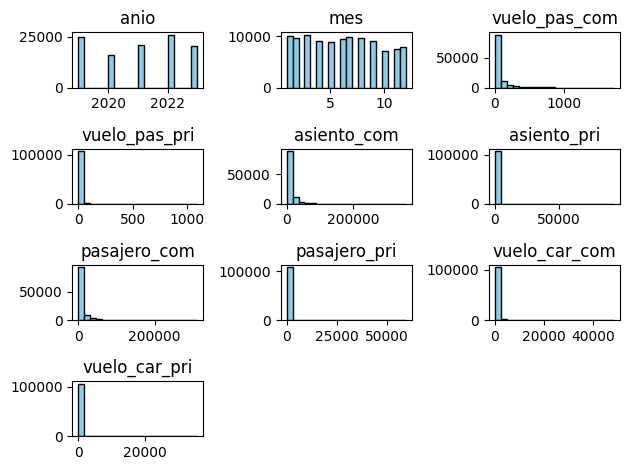

In [ ]:
# Histogramas de las variables numéricas
plt.figure(figsize=(12, 8))
dfv2.hist(color='skyblue', bins=20, edgecolor='black', grid=False)
plt.tight_layout()
plt.show()

Histograma que muestra la distribución de todas las variables numericas del dataframe

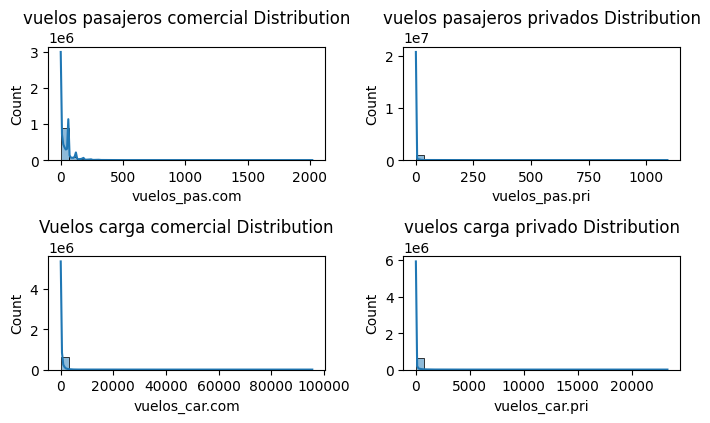

In [ ]:
# Creando las visualizaciones de las distribuciones en las variables del dataframe
plt.figure(figsize=(7, 6))#define tamaño del grafico pricipal
plt.subplot(3, 2, 1)#genera subgraficos dentro del grafico principal
sns.histplot(df['vuelos_pas.com'], bins=30, kde=True)#genera histograma con la variable 'vuelos pasajeros comerciales'
plt.title('vuelos pasajeros comercial Distribution')#titulo del histograma
plt.subplot(3, 2, 2)
sns.histplot(df['vuelos_pas.pri'], bins=30, kde=True)#genera histograma con la variable 'vuelos pasajeros privado'
plt.title('vuelos pasajeros privados Distribution')#titulo del histograma
plt.subplot(3, 2, 3)
sns.histplot(df['vuelos_car.com'], bins=30, kde=True)
plt.title('Vuelos carga comercial Distribution')
plt.subplot(3, 2, 4)
sns.histplot(df['vuelos_car.pri'], bins=30, kde=True)
plt.title('vuelos carga privado Distribution')

plt.tight_layout()
plt.show()


Histograma que muestra la distribución solamente de vuelos de pasajeros y carga tanto comercial como privado

###Generación de boxplot

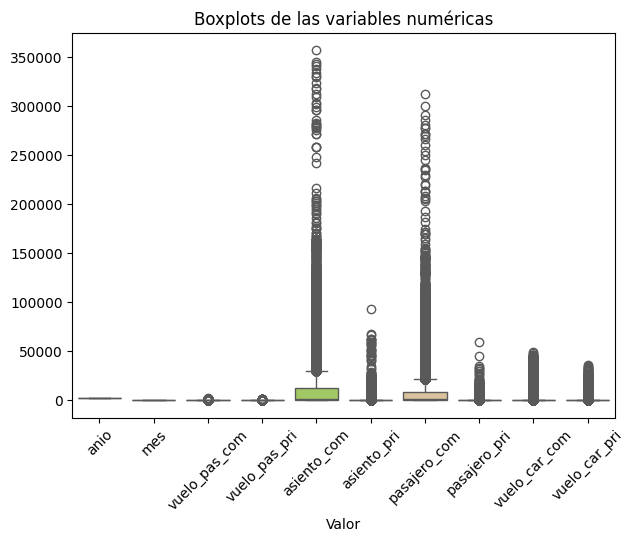

In [ ]:
# Boxplots de las variables numéricas
plt.figure(figsize=(7, 5))#definir tamaño de la figura
sns.boxplot(data=dfv2, orient='v', palette='Set2')#generar el boxplot
plt.xlabel('Valor')
plt.title('Boxplots de las variables numéricas')
plt.xticks(rotation=45)
plt.show()


Boxplot de cada una de las variables númericas del dataframe

<ipython-input-26-154f9e892124>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='año', y='vuelos_pas.com', data=df_ultimos_cinco_años, palette='Set2')


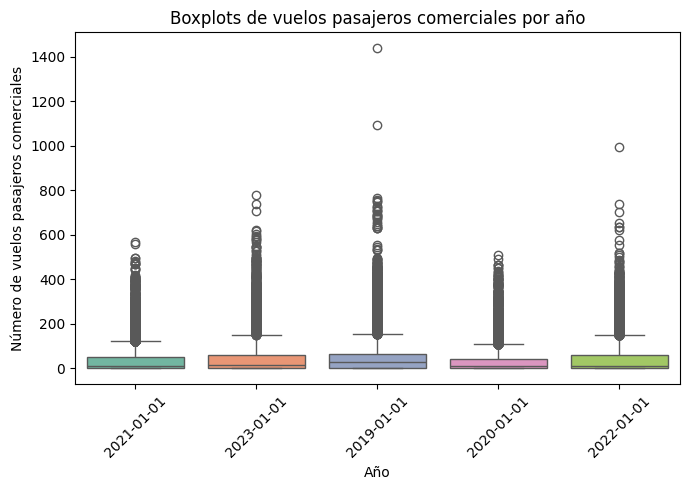

In [ ]:
# Boxplots de los vuelos de pasajeros comercial agrupadas por año
df['año'] = pd.to_datetime(df['año'], format='%Y')#pasar fecha a formato datetime
ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # extraer los ultimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

plt.figure(figsize=(7, 5))#difine el tamaño de la figura
sns.boxplot(x='año', y='vuelos_pas.com', data=df_ultimos_cinco_años, palette='Set2')#genera el boxplot en la variable vuelos pasajeros comerciales
#sns.boxplot(x='año', y='vuelos_pas.com', data=df, palette='Set2')
plt.xlabel('Año')
plt.ylabel('Número de vuelos pasajeros comerciales')
plt.title('Boxplots de vuelos pasajeros comerciales por año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot de la variable 'Vuelos de pasajeros comerciales', se muestra la distribución de dichos vuelos de los ultimos 5 años

<ipython-input-28-a2857aab84ec>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='año', y='vuelos_car.com', data=df_ultimos_cinco_años, palette='Set2')


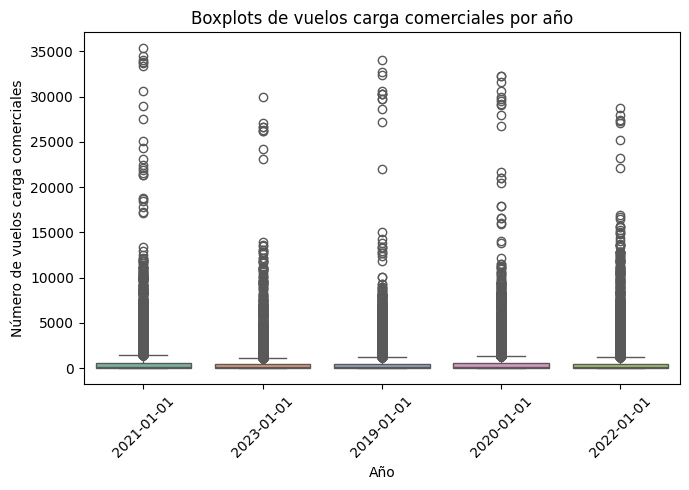

In [ ]:
# Boxplots de vuelos de carga comercial agrupadas por año
df['año'] = pd.to_datetime(df['año'], format='%Y')# pasa la fecha a formato datetime
ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # se toma los Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

plt.figure(figsize=(7, 5))#tamaño de la figura
sns.boxplot(x='año', y='vuelos_car.com', data=df_ultimos_cinco_años, palette='Set2')#generar boxplot de la variable 'vuelo carga comercial'
#sns.boxplot(x='año', y='vuelos_pas.com', data=df, palette='Set2')
plt.xlabel('Año')
plt.ylabel('Número de vuelos carga comerciales')
plt.title('Boxplots de vuelos carga comerciales por año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Boxplot de la variable 'Vuelos de carga comerciales', se muestra la distribución de dichos vuelos de los ultimos 5 años

### Generación de Gráficas de barra

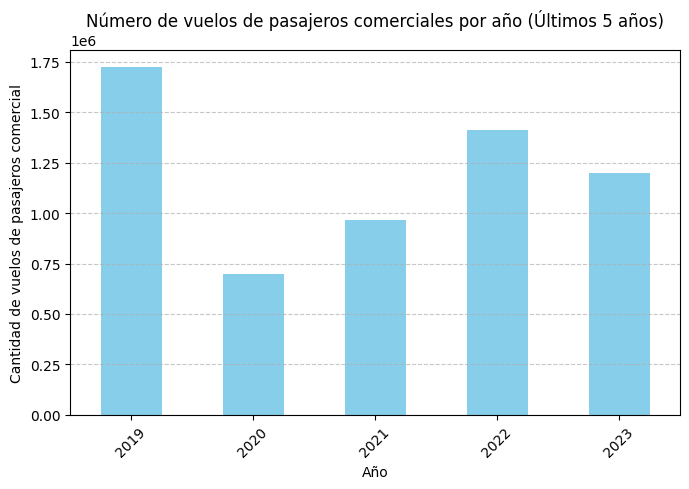

In [ ]:
# Gráfico de barras para los vuelos pasajero comercial por año (ultimos 5 años)

df['año'] = pd.to_datetime(df['año'], format='%Y') # Convertir la columna 'año' a tipo datetime

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # tomar los Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

#agrupa los datos de 'vuelos pasajeros comerciales' por año y contarlos
vuelos_por_año = df_ultimos_cinco_años.groupby(df_ultimos_cinco_años['año'].dt.year)['vuelos_pas.com'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))#tamaño de la figura
vuelos_por_año.plot(kind='bar', color='skyblue')#genera grafico de barras
plt.title('Número de vuelos de pasajeros comerciales por año (Últimos 5 años)')
plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos de pasajeros comercial')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal
plt.tight_layout()
plt.show()


La gráfica muestra la cantidad de vuelos de pasajeros comerciales por cada año, y se observa que el año con la mayor cantidad fue el 2019 y con menor cantidad de vuelos fue el 2020

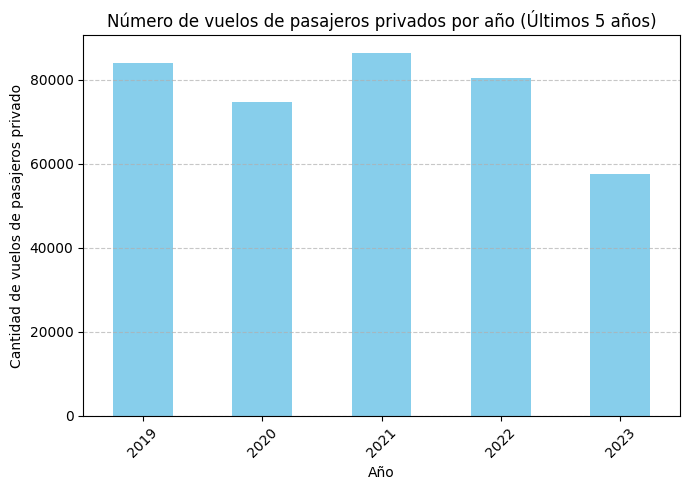

In [ ]:
# Gráfico de barras para los vuelos pasajero privado por año (ultimos 5 años)

df['año'] = pd.to_datetime(df['año'], format='%Y') # Convertir la columna 'año' a tipo datetime

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

#agrupa los datos de 'vuelos pasajeros privados' por año y cuenta los vuelos
vuelos_por_año = df_ultimos_cinco_años.groupby(df_ultimos_cinco_años['año'].dt.year)['vuelos_pas.pri'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))#tamaño de la figura
vuelos_por_año.plot(kind='bar', color='skyblue')#genera el grafico de barra
plt.title('Número de vuelos de pasajeros privados por año (Últimos 5 años)')
plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos de pasajeros privado')
plt.xticks(rotation=45)  # Rotar los años en el eje x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal
plt.tight_layout()
plt.show()

La gráfica muestra la cantidad de vuelos de pasajeros privados por cada año, y en este caso el año con mayor cantidad ha sido el 2021 y con menor cantidad de vuelos fue el 2023

<Figure size 1200x600 with 0 Axes>

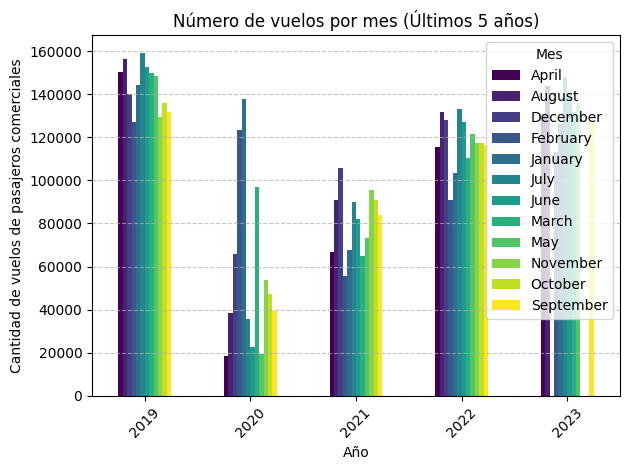

In [ ]:
# Gráfico de barras para los vuelos pasajero comercial por mes y año(ultimos 5 años)
df['año'] = pd.to_datetime(df['año'], format='%Y')#Convertir la columna 'año' a tipo datetime
df['mes'] = pd.to_datetime(df['mes'], format='%m').dt.month_name()

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # tomar los Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

# Agrupar por año y mes, y contar el número de vuelos
vuelos_por_mes = df_ultimos_cinco_años.groupby([df_ultimos_cinco_años['año'].dt.year, df_ultimos_cinco_años['mes']])['vuelos_pas.com'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
vuelos_por_mes.unstack().plot(kind='bar', colormap='viridis')
plt.title('Número de vuelos por mes (Últimos 5 años)')
plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos de pasajeros comerciales')
plt.xticks(rotation=45)  # Rotar los nombres de los meses en el eje x
plt.legend(title='Mes')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal
plt.tight_layout()
plt.show()

Se visualiza la representación de los vuelos de pasajeros comerciales por meses para cada uno de los últimos 5 años, el mes con mayor cantidad de vuelos comerciales fue julio del 2019

<Figure size 1200x600 with 0 Axes>

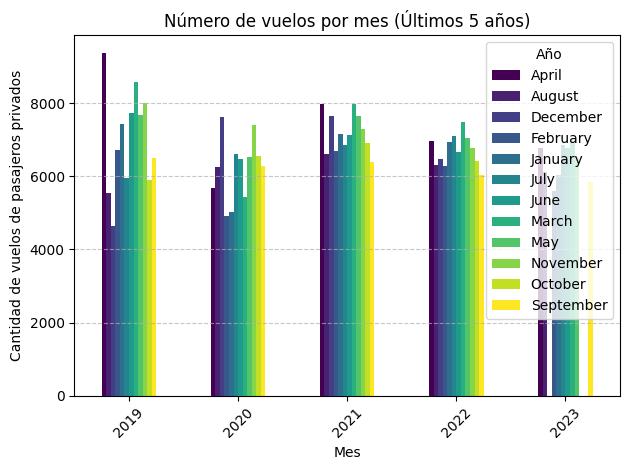

In [ ]:
# Gráfico de barras para los vuelos pasajeros privado por mes y año(ultimos 5 años)
df['año'] = pd.to_datetime(df['año'], format='%Y')
#df['mes'] = pd.to_datetime(df['mes'], format='%m').dt.month_name()

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

# Agrupar por año y mes, y contar el número de vuelos
vuelos_por_mes = df_ultimos_cinco_años.groupby([df_ultimos_cinco_años['año'].dt.year, df_ultimos_cinco_años['mes']])['vuelos_pas.pri'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
vuelos_por_mes.unstack().plot(kind='bar', colormap='viridis')
plt.title('Número de vuelos por mes (Últimos 5 años)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos de pasajeros privados')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir una cuadrícula horizontal
plt.tight_layout()
plt.show()

Esta gráfica muestra de los vuelos de pasajeros privados por meses para cada uno de los últimos 5 años, el mes con mayor cantidad de vuelos privados fue abril del 2019

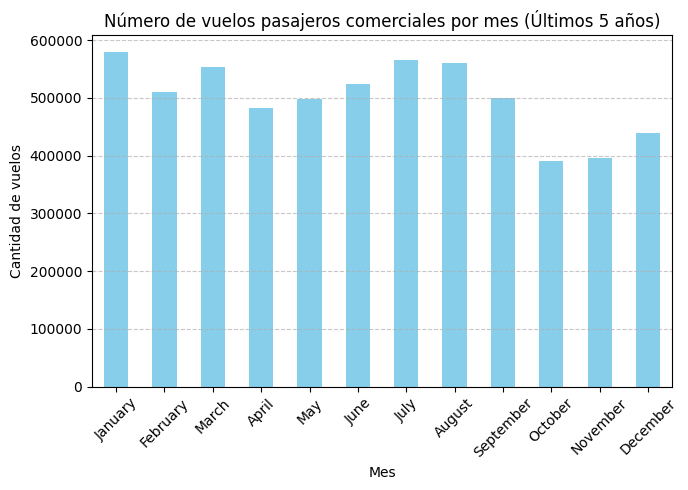

In [ ]:
#Grafico de vuelos de pasajeros comercial por mes
df['año'] = pd.to_datetime(df['año'], format='%Y') # Convertir la columna 'año' y 'mes' a tipo datetime
#df['mes'] = pd.to_datetime(df['mes'], format='%m').dt.month_name()

# Filtrar los últimos 5 años
ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

vuelos_por_mes = df_ultimos_cinco_años.groupby('mes')['vuelos_pas.com'].sum() # Agrupar por mes y contar el número de vuelos
# Ordenar los meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
vuelos_por_mes = vuelos_por_mes.reindex(meses_ordenados)

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))
vuelos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Número de vuelos pasajeros comerciales por mes (Últimos 5 años)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unificando cada uno de los meses de todos los ultimos 5 años, se observa que la mayor cantidad de vuelos de pasajeros comerciales ha sido en el de Enero, y el mes con menor cantidad de vuelo es octubre.

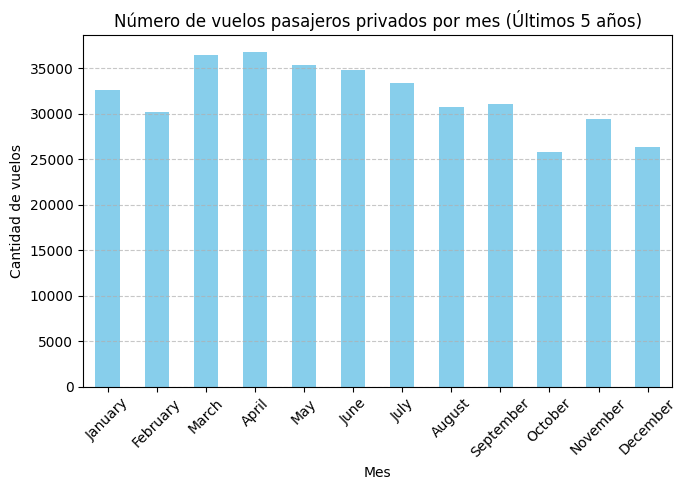

In [ ]:
#Grafico de vuelos de pasajeros privado por mes
df['año'] = pd.to_datetime(df['año'], format='%Y') # Convertir la columna 'año' y 'mes' a tipo datetime
#df['mes'] = pd.to_datetime(df['mes'], format='%m').dt.month_name()

# Filtrar los últimos 5 años
ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

vuelos_por_mes = df_ultimos_cinco_años.groupby('mes')['vuelos_pas.pri'].sum() # Agrupar por mes y contar el número de vuelos
# Ordenar los meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
vuelos_por_mes = vuelos_por_mes.reindex(meses_ordenados)

# Crear el gráfico de barras
plt.figure(figsize=(7, 5))
vuelos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Número de vuelos pasajeros privados por mes (Últimos 5 años)')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Unificando cada uno de los meses de todos los ultimos 5 años, se observa que la mayor cantidad de vuelos de pasajeros privados ha sido en el de abril seguido con una pequeña diferencia por marzo, y el mes con menor cantidad de vuelo es octubre.

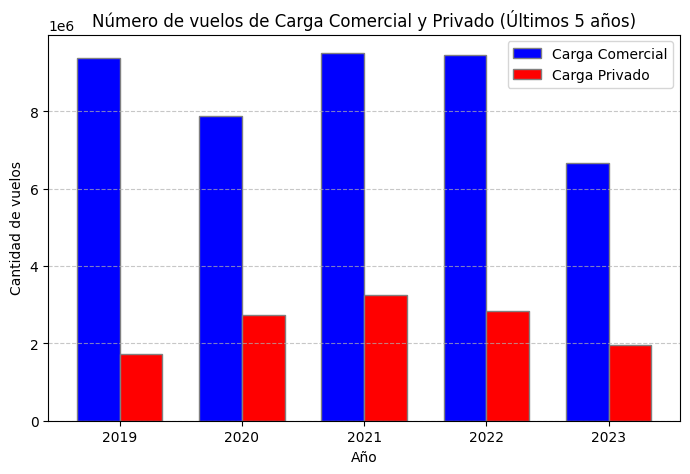

In [ ]:
#grafico de vuelos carga comercial y privado
df['año'] = pd.to_datetime(df['año'], format='%Y')

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

# Sumar el número de vuelos de carga comercial y vuelos de carga privado para cada año
vuelos_carga_comercial = df_ultimos_cinco_años.groupby('año')['vuelos_car.com'].sum()
vuelos_carga_privado = df_ultimos_cinco_años.groupby('año')['vuelos_car.pri'].sum()

# Crear el diagrama de barras
plt.figure(figsize=(7, 5))
bar_width = 0.35
r1 = range(len(vuelos_carga_comercial))
r2 = [x + bar_width for x in r1]

plt.bar(r1, vuelos_carga_comercial, color='b', width=bar_width, edgecolor='grey', label='Carga Comercial')
plt.bar(r2, vuelos_carga_privado, color='r', width=bar_width, edgecolor='grey', label='Carga Privado')

plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos')
plt.title('Número de vuelos de Carga Comercial y Privado (Últimos 5 años)')
plt.xticks([r + bar_width / 2 for r in range(len(vuelos_carga_comercial))], vuelos_carga_comercial.index.strftime('%Y'))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La gráfica muestra la cantidad de vuelos de carga comercial y privado, y se observa que los vuelos de carga comercial son superiores por mucho a los vuelos privados todos los años puestos en estudio(2019-2023).

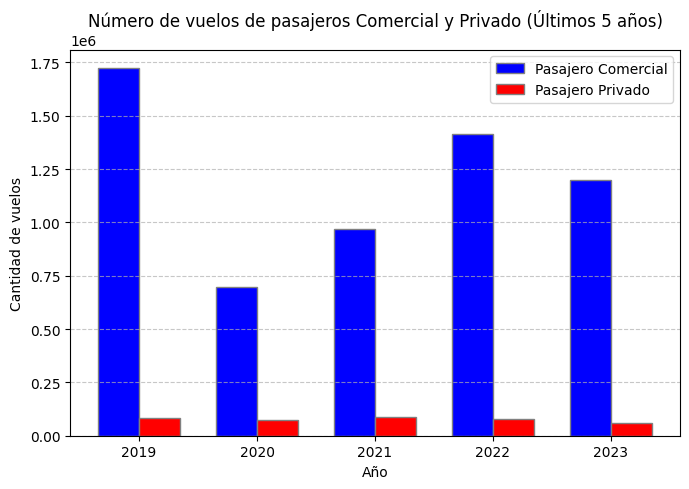

In [ ]:
#grafico de vuelos carga comercial y privado
df['año'] = pd.to_datetime(df['año'], format='%Y')

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

# Sumar el número de vuelos de carga comercial y vuelos de carga privado para cada año
vuelos_pasajero_comercial = df_ultimos_cinco_años.groupby('año')['vuelos_pas.com'].sum()
vuelos_pasajero_privado = df_ultimos_cinco_años.groupby('año')['vuelos_pas.pri'].sum()

# Crear el diagrama de barras
plt.figure(figsize=(7, 5))
bar_width = 0.35
r1 = range(len(vuelos_pasajero_comercial))
r2 = [x + bar_width for x in r1]

plt.bar(r1, vuelos_pasajero_comercial, color='b', width=bar_width, edgecolor='grey', label='Pasajero Comercial')
plt.bar(r2, vuelos_pasajero_privado, color='r', width=bar_width, edgecolor='grey', label='Pasajero Privado')

plt.xlabel('Año')
plt.ylabel('Cantidad de vuelos')
plt.title('Número de vuelos de pasajeros Comercial y Privado (Últimos 5 años)')
plt.xticks([r + bar_width / 2 for r in range(len(vuelos_pasajero_comercial))], vuelos_pasajero_comercial.index.strftime('%Y'))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La gráfica muestra la cantidad de vuelos de pasajeros comercial y privado, y se observa que los vuelos de pasajero comercial son superiores a los vuelos privados todos los años puestos en estudio(2019-2023)

### Diagramas de relación entre variables

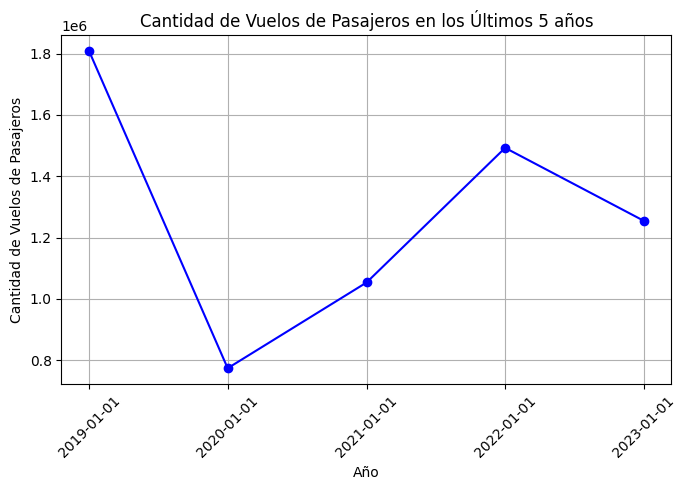

In [ ]:
#Grafica del comportamiento de vuelos de pasajeros en los ultimos 5 años
df['año'] = pd.to_datetime(df['año'], format='%Y')

ultimo_año = df['año'].max()
cinco_años_atras = ultimo_año - pd.DateOffset(years=4)  # Últimos 5 años
df_ultimos_cinco_años = df[df['año'] >= cinco_años_atras]

# Sumar el número total de vuelos de pasajeros para cada año
vuelos_pasajeros = df_ultimos_cinco_años.groupby('año')['vuelos_pas.com'].sum() + df_ultimos_cinco_años.groupby('año')['vuelos_pas.pri'].sum()

# Crear el gráfico de líneas
plt.figure(figsize=(7, 5))
plt.plot(vuelos_pasajeros.index, vuelos_pasajeros.values, marker='o', linestyle='-', color='b')
plt.title('Cantidad de Vuelos de Pasajeros en los Últimos 5 años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Vuelos de Pasajeros')
plt.xticks(vuelos_pasajeros.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Esta gráfica de linea muestra e comportamiento de la cantidad de vuelos pasajeros comerciales los 2019-2023, donde se observa que 2019 ha sido el año con mas vuelos y el 2020 con menor cantidad.

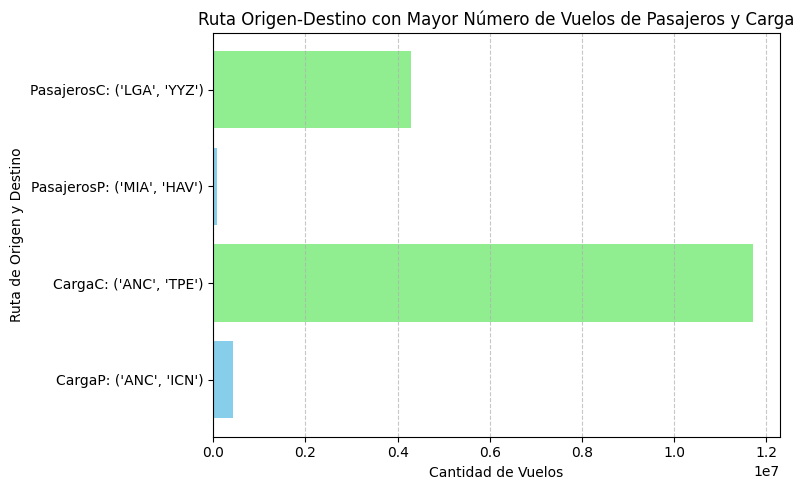

In [ ]:
#Grafico del ruta con mayor numero de vuelos de pasajeros y mayor numero de vuelos de carga
#Agrupar por la combinación de aeropuerto de origen y destino y sumar el número de vuelos de pasajeros y carga
rutas = df.groupby(['aeropuerto_ori', 'aeropuerto_des'])[['vuelos_pas.com', 'vuelos_car.com', 'vuelos_pas.pri', 'vuelos_car.pri']].sum()

# Encontrar la ruta con el mayor número de vuelos de pasajeros comerciales y privados
ruta_max_pasajeros = rutas['vuelos_pas.com'].idxmax()
num_vuelos_pasajeros = rutas['vuelos_pas.com'].max()

ruta_max_pasajerosp = rutas['vuelos_pas.pri'].idxmax()
num_vuelos_pasajerosp = rutas['vuelos_pas.pri'].max()

# Encontrar la ruta con el mayor número de vuelos de carga comercial y privado
ruta_max_carga = rutas['vuelos_car.com'].idxmax()
num_vuelos_carga = rutas['vuelos_car.com'].max()

ruta_max_cargap = rutas['vuelos_car.pri'].idxmax()
num_vuelos_cargap = rutas['vuelos_car.pri'].max()

# Crear un DataFrame para las rutas con los máximos vuelos de pasajeros y carga
df_max_rutas = pd.DataFrame({
    'Ruta': [f'CargaP: {ruta_max_cargap}', f'CargaC: {ruta_max_carga}', f'PasajerosP: {ruta_max_pasajerosp}', f'PasajerosC: {ruta_max_pasajeros}'],
    'Número de Vuelos': [num_vuelos_pasajeros, num_vuelos_carga, num_vuelos_pasajerosp, num_vuelos_cargap]
})

# Graficar el gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(df_max_rutas['Ruta'], df_max_rutas['Número de Vuelos'], color=['skyblue', 'lightgreen'])
plt.xlabel('Cantidad de Vuelos')
plt.ylabel('Ruta de Origen y Destino')
plt.title('Ruta Origen-Destino con Mayor Número de Vuelos de Pasajeros y Carga')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

La gráfica de barra que se observa aqui nos muestra la ruta con mayor cantidad de vuelos de pasajeros y carga, tanto comercial como privados, en donde se obtiene como rutas con mayor cantidad de vuelos lo siguiente:
<br>Mayor cantidad vuelo pasajeros comercial: **LGA(La Guardia Airport) - YYZ(Lester B. Pearson International Airport)**
<br>Mayor cantidad vuelo pasajero privado: **MIA(Miami International Airport)- HAV (José Martí International Airport)**
<br>Mayor cantidad vuelo carga comercial: **ANC(Ted Stevens Anchorage International Airport) - TPE(Taiwan Taoyuan International Airport)**
<br>Mayor cantidad vuelo carga privado: **ANC(Ted Stevens Anchorage International Airport) - ICN(Incheon International Airport)**

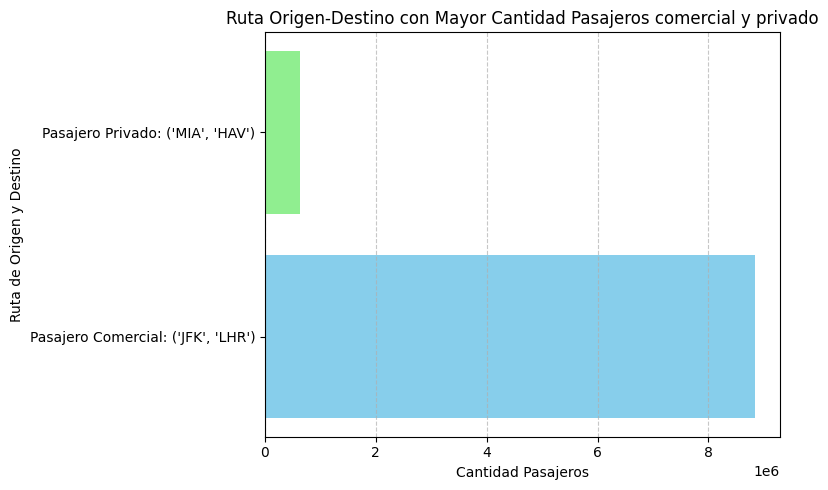

In [ ]:
#Grafico del ruta con mayor numero de cantidad de pasajeros en vuelo comercial y privado
#Agrupar por la combinación de aeropuerto de origen y destino y sumar cantidad pasajeros privados y comerciales
rutas = dfv2.groupby(['aeropuerto_ori', 'aeropuerto_des'])[['pasajero_com', 'pasajero_pri']].sum()

# Encontrar la ruta con el mayor número de pasajeros comerciales y privados
ruta_max_pasajerosc = rutas['pasajero_com'].idxmax()
num_pasajeros_com = rutas['pasajero_com'].max()

ruta_max_pasajerosp = rutas['pasajero_pri'].idxmax()
num_pasajeros_pri = rutas['pasajero_pri'].max()

# Crear un DataFrame para las rutas con los máximos numeros de pasajeros
df_max_rutas = pd.DataFrame({
    'Ruta': [f'Pasajero Comercial: {ruta_max_pasajerosc}', f'Pasajero Privado: {ruta_max_pasajerosp }'],
    'Cantidad Pasajeros': [num_pasajeros_com, num_pasajeros_pri]
})

# Graficar el gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(df_max_rutas['Ruta'], df_max_rutas['Cantidad Pasajeros'], color=['skyblue', 'lightgreen'])
plt.xlabel('Cantidad Pasajeros')
plt.ylabel('Ruta de Origen y Destino')
plt.title('Ruta Origen-Destino con Mayor Cantidad Pasajeros comercial y privado')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

En esta representacion se visualiza las rutas con mayor cantidad de pasajeros en vuelos privados y comerciales, dichas rutas son las siguientes:
<br>Ruta Mayor cantidad de pasajeros en vuelo privado: **MIA(Miami International Airport)- HAV (José Martí International Airport)**
<br>Ruta Mayor cantidad de pasajeros en vuelo comercial: **JFK(John F Kennedy International Airport) - LHR(London Heathrow Airport)**

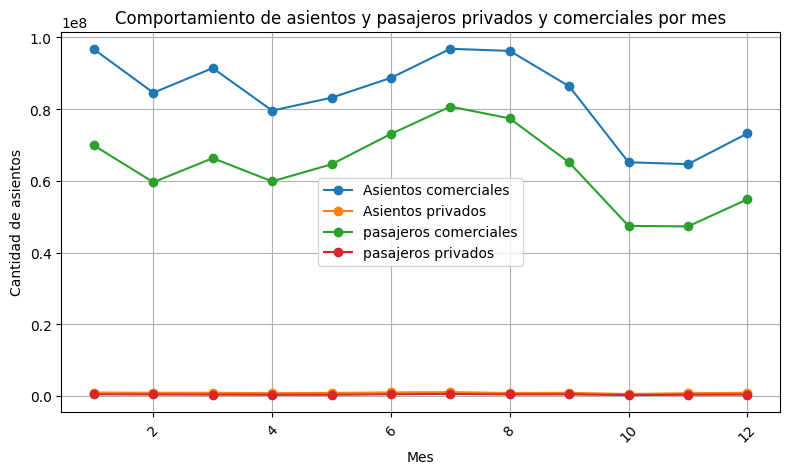

In [ ]:
asientos_por_mes = dfv2.groupby('mes')[['asiento_com', 'asiento_pri', 'pasajero_com', 'pasajero_pri']].sum()

# Crear el gráfico de líneas para mostrar el número de asientos por mes
plt.figure(figsize=(8, 5))
plt.plot(asientos_por_mes.index, asientos_por_mes['asiento_com'], marker='o', linestyle='-', label='Asientos comerciales')
plt.plot(asientos_por_mes.index, asientos_por_mes['asiento_pri'], marker='o', linestyle='-', label='Asientos privados')
plt.plot(asientos_por_mes.index, asientos_por_mes['pasajero_com'], marker='o', linestyle='-', label='pasajeros comerciales')
plt.plot(asientos_por_mes.index, asientos_por_mes['pasajero_pri'], marker='o', linestyle='-', label='pasajeros privados')
plt.xlabel('Mes')
plt.ylabel('Cantidad de asientos')
plt.title('Comportamiento de asientos y pasajeros privados y comerciales por mes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se observa que las cantidades de asientos comerciales y pasajeros comerciales varían un poco entre cada mes, y en el caso de asientos y pasajeros privados se mantienen al mismo nivel todos los meses.

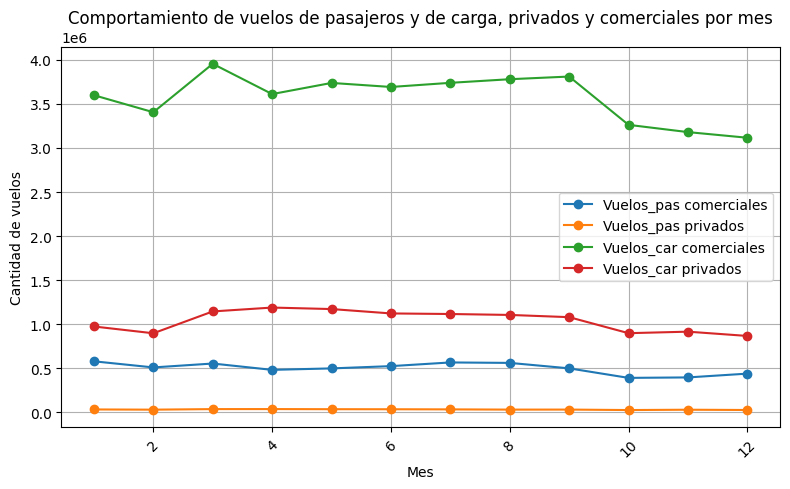

In [ ]:
# Agrupar por mes y sumar el número de vuelos de pasajeros privados y comerciales para cada mes
vuelos_por_mes = dfv2.groupby('mes')[['vuelo_pas_com', 'vuelo_pas_pri', 'vuelo_car_com', 'vuelo_car_pri']].sum()

# Crear el gráfico de líneas para mostrar el número de vuelos por mes
plt.figure(figsize=(8, 5))
plt.plot(vuelos_por_mes.index, vuelos_por_mes['vuelo_pas_com'], marker='o', linestyle='-', label='Vuelos_pas comerciales')
plt.plot(vuelos_por_mes.index, vuelos_por_mes['vuelo_pas_pri'], marker='o', linestyle='-', label='Vuelos_pas privados')
plt.plot(vuelos_por_mes.index, vuelos_por_mes['vuelo_car_com'], marker='o', linestyle='-', label='Vuelos_car comerciales')
plt.plot(vuelos_por_mes.index, vuelos_por_mes['vuelo_car_pri'], marker='o', linestyle='-', label='Vuelos_car privados')
plt.xlabel('Mes')
plt.ylabel('Cantidad de vuelos')
plt.title('Comportamiento de vuelos de pasajeros y de carga, privados y comerciales por mes')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Se muestra el comportamiento de los vuelos de pasajeros y cargas comerciales y privados, y se observa que los vuelos de pasajeros privado son los menos frecuentes y se mantienen a lo largo de los meses, a su vez los vuelos de carga comercial son los que mayor demanda tienen y varían un poco entre los meses.